<a href="https://www.oguzerdogan.com/">
    <img src="https://www.oguzerdogan.com/wp-content/uploads/2020/10/logo_oz.png" width="200" align="right">
</a>

# RFM Analizi & Müşteri Segmentasyonu

<div class="alert alert-block alert-info" style="margin-top: 20px">

<strong><h2>İş Problemi</h2></strong>
<blockquote><p><strong>Problem:</strong> Bir e-ticaret şirketi müşterilerini segmentlere ayırıp bu segmentlere göre pazarlama stratejileri belirlemek istiyor.</p>
</blockquote>
<ul>
<li>Buna yönelik olarak müşterilerin davranışlarını tanımlayacağız ve bu davranışlarda öbeklenmelere göre gruplar oluşturacağız.</li>
<li>Yani ortak davranışlar sergileyenleri aynı gruplara alacağız ve bu gruplara özel satış ve pazarlama teknikleri geliştirmeye çalışacağız.</li>

</ul>
<strong><h2>Veri Seti Hikayesi</h2></strong>
<blockquote><p><strong>Veri Seti:</strong> <a href='https://archive.ics.uci.edu/ml/datasets/Online+Retail+II' target='_blank' class='url'>https://archive.ics.uci.edu/ml/datasets/Online+Retail+II</a></p>
</blockquote>
<ul>
<li>Online Retail II isimli veri seti İngiltere merkezli online bir satış mağazasının 01/12/2009 - 09/12/2011 tarihleri arasındaki satışlarını içeriyor.</li>
<li>Bu şirket hediyelik eşya satıyor. Promosyon ürünleri gibi düşünebilir.</li>
<li>Müşterilerinin çoğu da toptancı.</li>

</ul>
<strong><h2>Değişkenler</h2></strong>
<ul>
<li>InvoiceNo: Fatura numarası. Her işleme yani faturaya ait eşsiz numara. Eğer bu kod C ile başlıyorsa işlemin iptal edildiğini ifade eder.</li>
<li>StockCode: Ürün kodu. Her bir ürün için eşsiz numara.</li>
<li>Description: Ürün ismi</li>
<li>Quantity: Ürün adedi. Faturalardaki ürünlerden kaçar tane satıldığını ifade etmektedir.</li>
<li>InvoiceDate: Fatura tarihi ve zamanı.</li>
<li>UnitPrice: Ürün fiyatı (Sterlin cinsinden)</li>
<li>CustomerID: Eşsiz müşteri numarası</li>
<li>Country: Ülke ismi. Müşterinin yaşadığı ülke.</li>

</ul>
</div>

## Gerekli Kütüphanelerin Yüklenmesi

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
# Bütün satırların ve sütunların gösterilmesi
pd.set_option('display.max_columns', None); 
pd.set_option('display.max_rows', None);

# Virgülden sonra gösterilecek basamak sayısı
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df_2009_2010 = pd.read_excel("data/online_retail_II.xlsx", sheet_name = "Year 2009-2010")

In [3]:
df_2009_2010.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [4]:
# import ettiğim df'i sonraki geri dönme durumları için kopyalıyorum.
df = df_2009_2010.copy()

In [5]:
df.head(15)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


<div class="alert alert-success" role="alert">
Tek bir müşteriye ait birden fazla işlem var. Müşteri numarası ve fatura numaraları eşsiz dolayısıyla veri seti içerisinde çoklama işlemler mevcut.

Veri setini incelediğimizde adet sayısı ve ürün başına miktar var fakat faturaya ödenen para mevcut değil. 

Eğer quantity sütunu ile price sütununu çarpıp toplarsak faturaya ödenen parayı hesaplayabiliriz.
</div>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


<div class="alert alert-success" role="alert">
Burada;

**object :** kategorik değişken

**float :** sayısal değişken

**datetime:** zaman değişkenini ifade ediyor.

Toplamda **541.910** gözlemimiz var.Customer ID ve Description kısmındaki NA değerler göze çarpıyor. 
</div>

In [7]:
# Verisetindeki eksik gözlem sayıları
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [8]:
# Eşsiz ürün sayısı?
df["Description"].nunique()

4681

In [9]:
# Hangi üründen kaçar tane var? 
df["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    3549
REGENCY CAKESTAND 3 TIER              2212
STRAWBERRY CERAMIC TRINKET BOX        1843
PACK OF 72 RETRO SPOT CAKE CASES      1466
ASSORTED COLOUR BIRD ORNAMENT         1457
Name: Description, dtype: int64

In [10]:
# En çok sipariş edilen ürünler neler?
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WHITE HANGING HEART T-LIGHT HOLDER,57733
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54698
BROCADE RING PURSE,47647
PACK OF 72 RETRO SPOT CAKE CASES,46106
ASSORTED COLOUR BIRD ORNAMENT,44925


In [11]:
# Ürüne ödenen miktarı belirten bir değişken yok, bunu ekleyelim
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [12]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00


In [13]:
# İptal edilen işlemlerin başında C ifadesi geçiyor. İptal edilen işlemleri görelim
df[df["Invoice"].str.contains("C", na=False)].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia,-35.40
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia,-9.90
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia,-17.00
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia,-12.60
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia,-35.40


In [14]:
#En çok iade alan ürüm?
df1 = df[df["Invoice"].str.contains("C", na=False)]
df1["Description"].value_counts().head()

Manual                            294
BAKING SET 9 PIECE RETROSPOT      184
REGENCY CAKESTAND 3 TIER          166
STRAWBERRY CERAMIC TRINKET BOX    129
WHITE CHERRY LIGHTS               120
Name: Description, dtype: int64

In [15]:
# İptal edilen ürünlerden kurtulma
df = df[~df["Invoice"].str.contains("C", na=False)]

In [16]:
# Her bir faturanın tutarını öğrenme
df.groupby("Invoice").agg({"TotalPrice":"sum"}).head()

,TotalPrice
Invoice,
489434,505.30
489435,145.80
489436,630.33
489437,310.75
489438,2286.24


In [17]:
# Hangi ülkeden kaçar tane sipariş var ?
df["Country"].value_counts().head()

United Kingdom    477058
EIRE                9460
Germany             7661
France              5532
Netherlands         2730
Name: Country, dtype: int64

In [18]:
# En çok para kazandıran 5 ülke?
df.groupby("Country").agg({"TotalPrice":"sum"}).sort_values("TotalPrice",ascending = False).head()

,TotalPrice
Country,
United Kingdom,8709203.67
EIRE,380977.82
Netherlands,268786.00
Germany,202395.32
France,147211.49


In [19]:
# Eksik gözlemlerden kurtulma
def del_na(dataframe):
    print("Number of observations: ",dataframe.shape[0])
    dataframe = dataframe.dropna()
    print("Number of new observations: ",dataframe.shape[0])
    print("Is there any NA value?")
    print(dataframe.isnull().values.any())
    return dataframe

df = del_na(df)

Number of observations:  515255
Number of new observations:  407695
Is there any NA value?
False


# RFM SKORLARI İLE MÜŞTERİ SEGMENTASYONU

<div class="alert alert-success" role="alert">
Recency, Frequency, Monetary ifadelerinin baş harflerinden oluşur.

Müşterilerin satın alma alışkanlıkları üzerinden pazarlama ve satış stratejileri belirlemeye yardımcı olan bir tekniktir.

Recency (yenilik): Müşterinin son satın almasından bugüne kadar geçen süre

- Diğer bir ifadesiyle “Müşterinin son temasından bugüne kadar geçen süre” dir.

- Bugünün tarihi - Son satın alma

- Örnek verecek olursak bugün bu analizi yapıyorsak bugünün tarihi - son ürün satın alma tarihi.

- Bu örneğin 20 olabilir 100 olabilir. Biliriz ki 20 olan müşteri daha sıcaktır. Daha son zamanlarda bizimle teması olmuştur.

Frequency (Sıklık): Toplam satın alma sayısı.

Monetary (Parasal Değer): Müşterinin yaptığı toplam harcama.
</div>    

In [20]:
# Verisetindeki ilk fatura tarihi
df["InvoiceDate"].min()

Timestamp('2009-12-01 07:45:00')

In [21]:
# Verisetindeki son fatura tarihi
df["InvoiceDate"].max()

Timestamp('2010-12-09 20:01:00')

In [22]:
#bugünün tarihi olarak son fatura tarihini belirtme
today_date = dt.datetime(2010, 12, 9)
today_date

datetime.datetime(2010, 12, 9, 0, 0)

In [23]:
df.head(1)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40


# Recency

<div class="alert alert-success" role="alert">
<p><strong>Recency(Yenilik):</strong> Müşterinin son satın alma tarihi.</p>
<p>Veri setindeki son fatura tarihi son gün olarak belirleniyor.</p>
<p>Tüm müşterilere özel olarak son günden müşterinin son fatura tarihi çıkartılıyor.</p>
</div>    

In [24]:
# Her bir müşterinin son alışveriş yapma bilgisine erişme
df.groupby("Customer ID").agg({"InvoiceDate":"max"}).head()

,InvoiceDate
Customer ID,
12346.00,2010-06-28 13:53:00
12347.00,2010-12-07 14:57:00
12348.00,2010-09-27 14:59:00
12349.00,2010-10-28 08:23:00
12351.00,2010-11-29 15:23:00


In [25]:
# Customer ID int çevirme
df["Customer ID"] = df["Customer ID"].astype(int)

In [26]:
# Herbir müşteri için bugünün tarihinden son satın alma tarihlerini çıkartma
temp_df = (today_date - df.groupby("Customer ID").agg({"InvoiceDate":"max"})).head()

In [27]:
temp_df.head()

,InvoiceDate
Customer ID,
12346,163 days 10:07:00
12347,1 days 09:03:00
12348,72 days 09:01:00
12349,41 days 15:37:00
12351,9 days 08:37:00


In [28]:
# InvoiceDate kolon ismini Recency olarak değiştirme
temp_df.rename(columns = {"InvoiceDate":"Recency"}, inplace = True) 

In [29]:
temp_df.head()

,Recency
Customer ID,
12346,163 days 10:07:00
12347,1 days 09:03:00
12348,72 days 09:01:00
12349,41 days 15:37:00
12351,9 days 08:37:00


In [30]:
# Sadece Gün sayılarını alma
recency_df = temp_df["Recency"].apply(lambda x: x.days)

In [31]:
recency_df.head()

Customer ID
12346    163
12347      1
12348     72
12349     41
12351      9
Name: Recency, dtype: int64

In [32]:
# Tüm bu işlemleri kısa bir yol ile yapma:
recency_df = df.groupby("Customer ID").agg({"InvoiceDate": lambda x: (today_date - x.max()).days})
recency_df.rename(columns = {"InvoiceDate":"Recency"}, inplace = True) 

# Frequency

<div class="alert alert-success" role="alert">
<p><strong>Frequency (Sıklık):</strong> Toplam satın alma sayısı  </p>
<p>Customer ID&#39;ye göre groupby işlemi yapılacak ve toplam unique Invoice sayısı hesaplanacak</p>
</div>    

In [33]:
# count yerine nunique kullanıyorum çünkü faturalar çoklanmış bir şekilde ve bize sadece tekil fatura sayısının toplamı lazım 
freq_df = df.groupby(["Customer ID"]).agg({"Invoice":"nunique"})

In [34]:
freq_df.head()

,Invoice
Customer ID,
12346,11
12347,2
12348,1
12349,3
12351,1


In [53]:
# Invoice column ismini Frequency olarak değiştiriyorum
freq_df.rename(columns = {"Invoice" : "Frequency"}, inplace = True)

In [36]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00


# Monetary

<div class="alert alert-success" role="alert">

<p><strong>Monetary (Parasal Değer):</strong>Müşterinin toplamda harcadığı parayı gösterir.</p>
<p>Customer ID&#39;ye göre groupby işlemi yapılacak ve kişinin toplam TotalPrice&#39;ı hesaplanacak</p>
</div>    

In [54]:
# Kişi özelinde yapılan toplam harcamayı bulmak için Customer ID'ye göre groupby gerçekleştirip Fiyatların toplamını alıyorum.
monetary_df = df.groupby("Customer ID").agg({"TotalPrice":"sum"})

In [38]:
monetary_df.head()

,TotalPrice
Customer ID,
12346,372.86
12347,1323.32
12348,222.16
12349,2671.14
12351,300.93


In [39]:
monetary_df.rename(columns = {"TotalPrice":"Monetary"}, inplace = True)

# Kontrol

In [55]:
# Her şey yolunda mı kontrol edelim
print(recency_df.shape, freq_df.shape, monetary_df.shape)

(4314, 1) (4314, 1) (4314, 1)


# RFM

In [41]:
#Skorlama öncesi tablo hazırlığı
rfm = pd.concat([recency_df, freq_df, monetary_df], axis=1)

In [42]:
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,163,11,372.86
12347,1,2,1323.32
12348,72,1,222.16
12349,41,3,2671.14
12351,9,1,300.93


## Skorlama

<div class="alert alert-success" role="alert">
<p>Recency değişkeni için büyüklük ve küçüklük algısı farklı oluyor.  </p>
<p>Yani Recency değeri küçük olan gözlemler bizim için daha yüksek bir öneme sahip.  </p>
<p>Frequency ve Monetary değişkeninde ise yüksek değere sahip gözlemler bizim için daha iyi.  </p>
<p>Buna göre <strong>qcut</strong> yani quantile hesabı yaparak verisetindeki değerleri 5 parçaya bölüyoruz.  </p>
<p>Bahsedilen büyüklük küçüklük algısına göre değer aralıkları etiketleniyor.  </p>
<p>Nihai olarak; <strong>Recency</strong>, <strong>Frequency</strong> ve <strong>Monetary</strong> değişkenlerinin skorlarını elde ediyoruz</p>
</div>

In [43]:
rfm["RecencyScore"] = pd.qcut(rfm["Recency"], 5, labels=[5, 4, 3, 2, 1])
rfm["FrequencyScore"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1,2,3,4,5])
rfm["MonetaryScore"] = pd.qcut(rfm["Monetary"], 5, labels=[1,2,3,4,5])
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
12346,163,11,372.86,2,5,2
12347,1,2,1323.32,5,2,4
12348,72,1,222.16,2,1,1
12349,41,3,2671.14,3,3,5
12351,9,1,300.93,5,1,2


In [56]:
# Tüm bu skorları tek bir değişkende toplayalım
rfm["RFM_SCORE"]=(rfm["RecencyScore"].astype(str)+
                  rfm["MonetaryScore"].astype(str)+
                  rfm["FrequencyScore"].astype(str))

In [45]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346,163,11,372.86,2,5,2,225
12347,1,2,1323.32,5,2,4,542
12348,72,1,222.16,2,1,1,211
12349,41,3,2671.14,3,3,5,353
12351,9,1,300.93,5,1,2,521


# RFM Segmentasyonu

<div class="alert alert-success" role="alert">
<p>Her bir <strong>R, F ve M</strong> değerlerinden oluşan bir skorlama bize 125 farklı kombinasyon veriyor.</p>
<p>Fakat bu sayı çok fazla olduğu için biraz daha basite indirgememiz gerekli. </p>
<p>Monetary değeri önemli bir değişken fakat; </p>
<p>Bir müşterinin bizi en son ne zaman ziyaret ettiği, ne sıklıkta ziyaret ettiklerinin yanında daha az bir öneme sahip. </p>
<p>Bu sebeple sadece Recency ve Frequency skorlarından oluşacak bir segment haritası çıkarıyoruz.</p>
</div>    

In [57]:
# Regular Expressions (Düzenli İfadeler) ile RFM haritası
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [47]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346,163,11,372.86,2,5,2,225,Can't Lose
12347,1,2,1323.32,5,2,4,542,Potential Loyalists
12348,72,1,222.16,2,1,1,211,Hibernating
12349,41,3,2671.14,3,3,5,353,Need Attention
12351,9,1,300.93,5,1,2,521,New Customers


In [48]:
rfm[["Segment","Recency","Frequency","Monetary"]].groupby("Segment").agg(["min","max","mean","count"])

Recency                   Frequency                   \
                        min  max   mean count       min  max  mean count   
Segment                                                                    
About to Sleep           35   69  51.82   343         1    2  1.20   343   
At Risk                  70  370 150.16   611         2    6  3.07   611   
Can't Lose               70  296 122.12    77         6   46  9.12    77   
Champions                -1   13   5.12   663         3  205 12.55   663   
Hibernating              70  372 212.06  1017         1    2  1.13  1017   
Loyal Customers          14   69  34.29   742         3   42  6.83   742   
Need Attention           35   69  51.27   207         2    3  2.45   207   
New Customers            -1   13   6.58    50         1    1  1.00    50   
Potential Loyalists      -1   34  16.79   517         1    3  2.02   517   
Promising                14   34  23.75    87         1    1  1.00    87   

                    Monetary                          
                         min       max    mean count  
Segment                                               
About to Sleep         24.40   3502.48  441.32   343  
At Risk                24.05  34095.26 1188.88   611  
Can't Lose            181.35  26286.75 4099.45    77  
Champions              75.76 349164.35 6852.26   663  
Hibernating             0.00  11880.84  403.18  1017  
Loyal Customers        97.40  50291.38 2746.07   742  
Need Attention        101.10  13544.99 1060.36   207  
New Customers          35.40   2945.38  386.20    50  
Potential Loyalists    10.95  12079.99  729.51   517  
Promising              30.30   2389.62  367.09    87

In [49]:
rfm[rfm["Segment"] == "Need Attention"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12349,41,3,2671.14,3,3,5,353,Need Attention
12369,47,3,1791.15,3,3,4,343,Need Attention
12371,43,3,2179.42,3,3,5,353,Need Attention
12374,55,3,2246.29,3,3,5,353,Need Attention
12389,36,3,1433.33,3,3,4,343,Need Attention


# Segmentlerin Verisetindeki Oranları

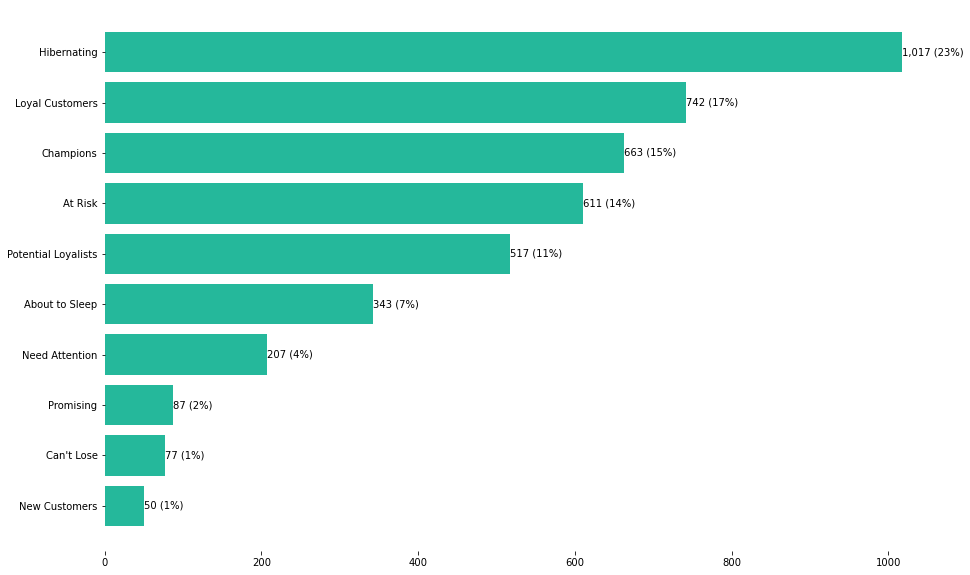

In [50]:
#reference: https://github.com/ahmetcankaraoglan/RFM-Analizi-ile-Musteri-Segmentasyonu/blob/main/RFM%20Analizi%20ile%20Müşteri%20Segmentasyonu.ipynb
# thanks for my dear friend Ahmet

segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(15,10))

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='#25B89B')
ax.set_frame_on(False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Can\'t loose']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

# Segmentlerin Tanımlayıcı İstatistikleri

In [51]:
rfm[["Segment", "Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean","count","max"])

Recency            Frequency            Monetary        \
                       mean count  max      mean count  max     mean count   
Segment                                                                      
About to Sleep        51.82   343   69      1.20   343    2   441.32   343   
At Risk              150.16   611  370      3.07   611    6  1188.88   611   
Can't Lose           122.12    77  296      9.12    77   46  4099.45    77   
Champions              5.12   663   13     12.55   663  205  6852.26   663   
Hibernating          212.06  1017  372      1.13  1017    2   403.18  1017   
Loyal Customers       34.29   742   69      6.83   742   42  2746.07   742   
Need Attention        51.27   207   69      2.45   207    3  1060.36   207   
New Customers          6.58    50   13      1.00    50    1   386.20    50   
Potential Loyalists   16.79   517   34      2.02   517    3   729.51   517   
Promising             23.75    87   34      1.00    87    1   367.09    87   

                               
                          max  
Segment                        
About to Sleep        3502.48  
At Risk              34095.26  
Can't Lose           26286.75  
Champions           349164.35  
Hibernating          11880.84  
Loyal Customers      50291.38  
Need Attention       13544.99  
New Customers         2945.38  
Potential Loyalists  12079.99  
Promising             2389.62

# Segment Yorumları & Aksiyon Tavsiyeleri

## Champions

![image-20201207235656457](images/image-20201207235656457.png)

<div class="alert alert-warning" role="alert" style="margin-top: 20px">
En iyi müşterilerimiz bu gruptalar. Son alışveriş tarihleri en yakın olan ve bizi en sık ziyaret eden gruptan oluşuyor. 

Verisetinin yaklaşık %15’i şampiyonlardan.

<p><strong>Bize ortalama olarak;</strong></p>

<strong>6852</strong> birim para kazandırmışlar

Ziyaret etme sıklıkları <strong>13</strong>

En son <strong>5</strong> gün önce alışveriş yapmışlar.
</div>    

<div class="alert alert-success" role="alert">
<p><strong>Aksiyon önerileri:</strong></p>
<p>Onları sevdiğimizi ve özel olduklarını hissettirmeliyiz.</p>
<p>Yeni koleksiyonları test etmeleri için ilk olarak onlara gönderebiliriz.</p>
<p>Belirli periyotlarda sadece kendilerine özel hediyeler gönderebiliriz.</p>
<p>Doğum günlerinde, özel günlerde mesaj atabiliriz.</p>
</div>    

## Can't Loose Them

![image-20201207235750200](images/image-20201207235750200.png)

<div class="alert alert-warning" role="alert" style="margin-top: 20px">
<p>Bizden çok sık alışveriş yapan, güzel para bırakan müşterilerimiz bu grupta. Ancak son zamanlarda ziyaretimize gelmemişler.</p>
<p>Acilen bir şeyler yapmalıyız yoksa churn olabilirler</p>
<p>Verisetinin yaklaşık %1’i bu gruptan.</p>
<p><strong>Bize ortalama olarak;</strong></p>
<p><strong>6852</strong> birim para kazandırmışlar</p>
<p>Ziyaret etme sıklıkları <strong>13</strong></p>
<p>En son <strong>5</strong> gün önce alışveriş yapmışlar.</p>
</div>    

<div class="alert alert-success" role="alert">
<p><strong>Aksiyon önerileri:</strong></p>
<p>Bizim için önemlisiniz mesajı verebileceğimiz aktiviteler yapmalıyız.</p>
<p>Yeni ürünleri düşük indirimlerle önerebiliriz.</p>
<p>Mutlaka kendilerine özel kampanyalar yapılmalı.</p>
<p>Kendimizi hatırlatmalıyız, özel günlerde mesaj atabiliriz.</p>
</div>    

## Need Attention

![image-20201209005015255](images/image-20201209195609883.png)

<div class="alert alert-warning" role="alert" style="margin-top: 20px">
<p><strong>Uyku grubuna değil Sadıklar grubuna!</strong></p>
<p>Onların bir sonraki grubunu belirlemek neredeyse bize bağlı.</p>
<p>Verisetinin yaklaşık %4’ü bu gruptan.</p>
<p><strong>Bize ortalama olarak;</strong></p>
<p><strong>1060</strong> birim para kazandırmışlar</p>
<p>Ziyaret etme sıklıkları <strong>2</strong></p>
<p>En son <strong>51</strong> gün önce alışveriş yapmışlar.</p>
</div>   

<div class="alert alert-success" role="alert">
<p><strong>Aksiyon önerileri:</strong></p>
<p>Loyal Customer tarafına çekmeliyiz, kendimizi sık sık hatırlatmalıyız</p>
<p>Kısa zamanlı hediye kuponlar tavsiye edilebilir.</p>
</div>    

## New Customers

![image-20201208000218422](images/image-20201208000456834.png)

<div class="alert alert-warning" role="alert" style="margin-top: 20px">
<p><strong>Bizi daha yeni yeni tadan müşterilerimiz. Yakın zamanda bizi tercih etmişler ve bizi az ziyaret ediyorlar.</strong></p>
<p>Onların bir sonraki grubunu belirlemek neredeyse bize bağlı.</p>
<p>Verisetinin yaklaşık %4’ü bu gruptan.</p>
<p><strong>Bize ortalama olarak;</strong></p>
<p><strong>386</strong> birim para kazandırmışlar</p>
<p>Ziyaret etme sıklıkları <strong>1</strong></p>
<p>En son <strong>6</strong> gün önce alışveriş yapmışlar.</p>
</div>    

<div class="alert alert-success" role="alert">
<p><strong>Aksiyon önerileri:</strong></p>
<p>Bu sefer bizim özel olduğumuzu hissettirmeliyiz. </p>
<p>Bizi sık ziyaret etmelerini sağlamalıyız. İndirim mesajları atabiliriz.</p>
<p>Uygun promosyonlar ile bu gruptaki müşterilerimizi potansiyel sadık veya şampiyonlar sınıfına çekmeliyiz. </p>
<p>Arkadaşını getir ve kazan sistemi bu grupta uygulanabilir.</p>
</div>    